In [23]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import os
import numpy as np
import shelve
import PyPDF2 as pdf
import random
%matplotlib inline

In [24]:
discordBlue = '#7289da'
discordWhite = '#ffffff'
discordGray = '#99aab5'
discordDarkGray = '#2c2f33'
discordBlack = '#23272a'

In [25]:
class Encounter:
    def __init__(self, monsters=[], heroes=[]):
        print('Hello, world!')
        self.monsters = monsters
        self.heroes = heroes
        self.initiatives = []
        for monster in self.monsters:
            self.initiatives.append((monster, random.randint(1,20)))
        for hero in self.heroes:
            self.initiatives.append((hero, random.randint(1,20)))
        self.initiatives.sort(key=lambda creature: creature[1] ,reverse=True)

In [26]:
def SquareGrid(lengthSquares=12, scaling=100, backgroundColor=discordDarkGray, gridColor=discordGray):
    length = lengthSquares*scaling
    image = Image.new(mode='RGB', size=(length,length), color=gridColor)
    drawer = ImageDraw.Draw(image)
    for pixel in range(0, image.width, 100):
        drawer.line((pixel, 0, pixel, image.height), fill=backgroundColor, width=1)
    for pixel in range(0, image.height, 100):
        drawer.line((0, pixel, image.width, pixel), fill=backgroundColor, width=1)
    drawer.line((image.width-1, 0, image.width-1, image.height), fill=backgroundColor, width=1)
    drawer.line((0, image.height-1, image.width, image.height-1), fill=backgroundColor, width=1)
    return image

def RectangleGrid(widthSquares=12, heightSquares=6, scaling=100, backgroundColor=discordDarkGray, gridColor=discordGray):
    width = widthSquares*scaling
    height = heightSquares*scaling
    image = Image.new(mode='RGB', size=(width,height), color=gridColor)
    drawer = ImageDraw.Draw(image)
    for pixel in range(0, image.width, 100):
        drawer.line((pixel, 0, pixel, image.height), fill=backgroundColor, width=1)
    for pixel in range(0, image.height, 100):
        drawer.line((0, pixel, image.width, pixel), fill=backgroundColor, width=1)
    drawer.line((image.width-1, 0, image.width-1, image.height), fill=backgroundColor, width=1)
    drawer.line((0, image.height-1, image.width, image.height-1), fill=backgroundColor, width=1)
    return image

In [27]:
def CircleGrid(diameterSquares=12, backgroundColor=discordDarkGray, gridColor=discordGray, scaling=100):
    diameter = diameterSquares*scaling
    image = Image.new(mode='RGB', size=(diameter,diameter), color=backgroundColor)
    drawer = ImageDraw.Draw(image)
    drawer.ellipse((0, 0, diameter-1, diameter-1), fill=gridColor, outline='black')
    for pixel in range(0, image.width, 100):
        drawer.line((pixel, 0, pixel, image.height), fill=backgroundColor, width=1)
    for pixel in range(0, image.height, 100):
        drawer.line((0, pixel, image.width, pixel), fill=backgroundColor, width=1)
    drawer.line((image.width-1, 0, image.width-1, image.height), fill=backgroundColor, width=1)
    drawer.line((0, image.height-1, image.width, image.height-1), fill=backgroundColor, width=1)
    return image

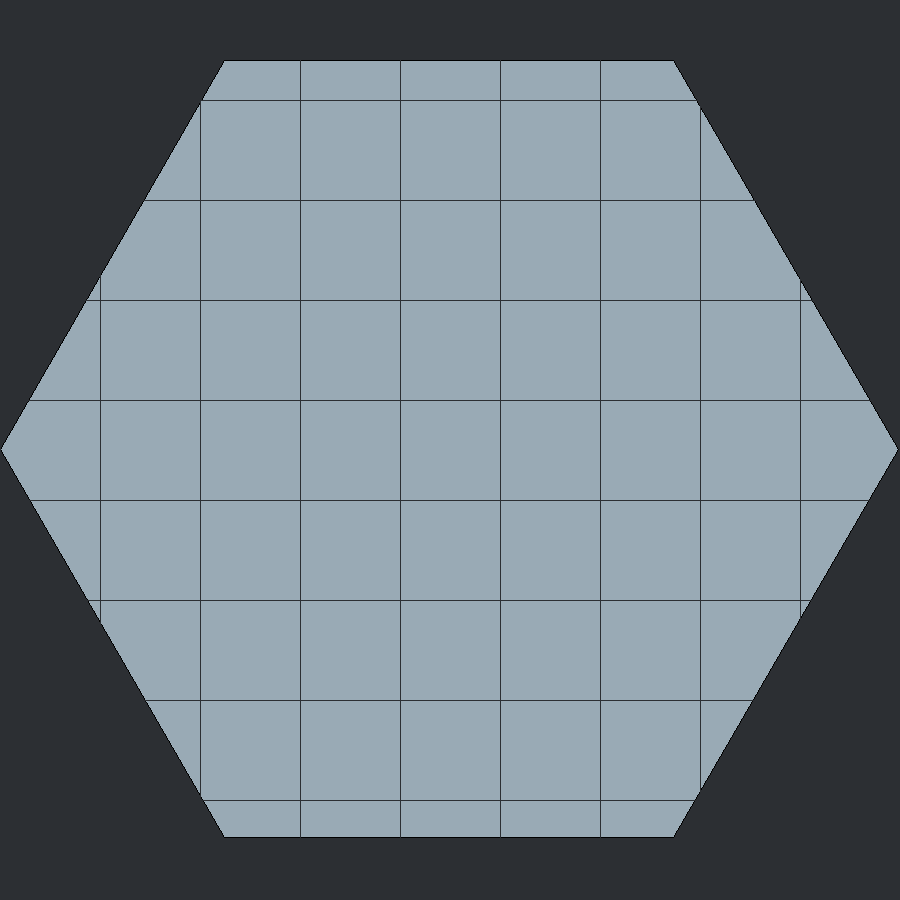

In [39]:
HexagonGrid(9)

In [30]:
def HexagonGrid(diameterSquares=12, scaling=100, backgroundColor=discordDarkGray, gridColor=discordGray):
    imageSize = diameterSquares*scaling
    image = Image.new(mode='RGB', size = (imageSize,imageSize), color=backgroundColor)
    drawer = ImageDraw.Draw(image)
    length = (imageSize/2)-1
    c60 = np.cos(np.pi/3)
    s60 = np.sin(np.pi/3)
    drawer.polygon((0,length,length*c60, length-(length*s60), length*(1+c60), length-(length*s60), 2*length, length, length*(1+c60), length+(length*s60), length*c60, length+(length*s60)), outline='black', fill=gridColor)
    for pixel in range(0, image.width, 100):
        drawer.line((pixel, 0, pixel, image.height), fill=backgroundColor, width=1)
    for pixel in range(0, image.height, 100):
        drawer.line((0, pixel, image.width, pixel), fill=backgroundColor, width=1)
    drawer.line((image.width-1, 0, image.width-1, image.height), fill=backgroundColor, width=1)
    drawer.line((0, image.height-1, image.width, image.height-1), fill=backgroundColor, width=1)
    return image

In [31]:
def OctagonGrid(diameterSquares=12, scaling=100, backgroundColor=discordDarkGray, gridColor=discordGray):
    imageSize = diameterSquares*scaling
    image = Image.new(mode='RGB', size = (imageSize,imageSize), color=backgroundColor)
    drawer = ImageDraw.Draw(image)
    length = imageSize
    side = length*np.tan(22.5*np.pi/180.0)
    drawer.polygon((0, (0.5*length - 0.5*side), (0.5*length - 0.5*side), 0, (0.5*length + 0.5*side), 0, length, (0.5*length - 0.5*side), length, (0.5*length + 0.5*side), (0.5*length + 0.5*side), length, (0.5*length - 0.5*side), length, 0, (0.5*length+0.5*side)), outline='black', fill=gridColor)
    #c60 = np.cos(np.pi/3)
    #s60 = np.sin(np.pi/3)
    #drawer.polygon((0,length,length*c60, length-(length*s60), length*(1+c60), length-(length*s60), 2*length, length, length*(1+c60), length+(length*s60), length*c60, length+(length*s60)), outline='black', fill='white')
    for pixel in range(0, image.width, 100):
        drawer.line((pixel, 0, pixel, image.height), fill=backgroundColor, width=1)
    for pixel in range(0, image.height, 100):
        drawer.line((0, pixel, image.width, pixel), fill=backgroundColor, width=1)
    drawer.line((image.width-1, 0, image.width-1, image.height), fill=backgroundColor, width=1)
    drawer.line((0, image.height-1, image.width, image.height-1), fill=backgroundColor, width=1)
    return image

In [32]:
def Chamber(roll=0, backgroundColor=discordDarkGray, gridColor=discordGray):
    if(roll < 1):
        roll = random.randint(1,20)
    elif(roll in range(1,3)):
        return SquareGrid(4)
    elif(roll in range(3,5)):
        return SquareGrid(6)
    elif(roll in range(5,7)):
        return SquareGrid(8)
    elif(roll in range(7, 10)):
        return RectangleGrid(4, 6)
    elif(roll in range(10, 13)):
        return RectangleGrid(6, 8)
    elif(roll in range(13, 15)):
        return RectangleGrid(8, 10)
    elif(roll in range(15, 16)):
        return RectangleGrid(10, 16)
    elif(roll in range(16, 17)):
        return CircleGrid(6)
    elif(roll in range(17,18)):
        return CircleGrid(10)
    elif(roll in range(18,19)):
        return OctagonGrid(8)
    elif(roll in range(19, 20)):
        return OctagonGrid(12)
    elif(roll in range(20,21)):
        return HexagonGrid(10)
    else:
        return SquareGrid(12)

In [33]:
def Grid(image, spacing):
    drawer = ImageDraw.Draw(image)
    for pixel in range(0, image.width, spacing):
        drawer.line((pixel, 0, pixel, image.height), fill=0, width=1)
    for pixel in range(0, image.height, spacing):
        drawer.line((0, pixel, image.width, pixel), fill=0, width=1)
    drawer.line((image.width-1, 0, image.width-1, image.height), fill=0, width=1)
    drawer.line((0, image.height-1, image.width, image.height-1), fill=0, width=1)

In [34]:
def CircleGridByArray(inputArray, spacing=100, backgroundColor=discordDarkGray, gridColor=discordGray):
    image = Image.new('RGB', (inputArray.shape[0]*spacing, inputArray.shape[1]*spacing), backgroundColor)
    #Grid(image, spacing)
    drawer = ImageDraw.Draw(image)
    drawer.ellipse((0,0, image.width-1, image.height-1), fill=discordGray, outline=gridColor)
    for row in range(len(inputArray)):
        for column in range(len(inputArray)):
            if(inputArray[row][column] == 1):
                drawer.line((row*spacing, column*spacing, row*spacing, ((column+1)*spacing)), fill=backgroundColor, width=1)
                drawer.line((row*spacing, column*spacing, (row+1)*spacing, column*spacing), fill=backgroundColor, width=1)
                drawer.line(((row+1)*spacing, column*spacing, (row+1)*spacing, ((column+1)*spacing)), fill=backgroundColor, width=1)
                drawer.line((row*spacing, (column+1)*spacing, (row+1)*spacing, ((column+1)*spacing)), fill=backgroundColor, width=1)
    return image

In [35]:
def CircleGridArray(diameterSquares=12, backgroundColor=discordDarkGray, gridColor=discordGray, scaling=100):
    diameter = diameterSquares*scaling
    dataArray = np.zeros((diameterSquares, diameterSquares))
    x, y = np.ogrid[0:diameterSquares, 0:diameterSquares]
    mask = (x-(diameterSquares-1)/2)**2 + (y-(diameterSquares-1)/2)**2 <= (diameterSquares/2)**2
    mask = mask.astype(int)
    image = Image.new(mode='RGB', size=(diameter,diameter), color=backgroundColor)
    drawer = ImageDraw.Draw(image)
    drawer.ellipse((0, 0, diameter-1, diameter-1), fill=gridColor, outline='black')
    for row in range(len(mask)):
        for column in range(len(mask[row])):
            if(mask[row][column] == 1):
                drawer.line((row*scaling, column*scaling, row*scaling, ((column+1)*scaling)), fill=backgroundColor, width=1)
                drawer.line((row*scaling, column*scaling, (row+1)*scaling, column*scaling), fill=backgroundColor, width=1)
                drawer.line(((row+1)*scaling, column*scaling, (row+1)*scaling, ((column+1)*scaling)), fill=backgroundColor, width=1)
                drawer.line((row*scaling, (column+1)*scaling, (row+1)*scaling, ((column+1)*scaling)), fill=backgroundColor, width=1)
    return image, mask

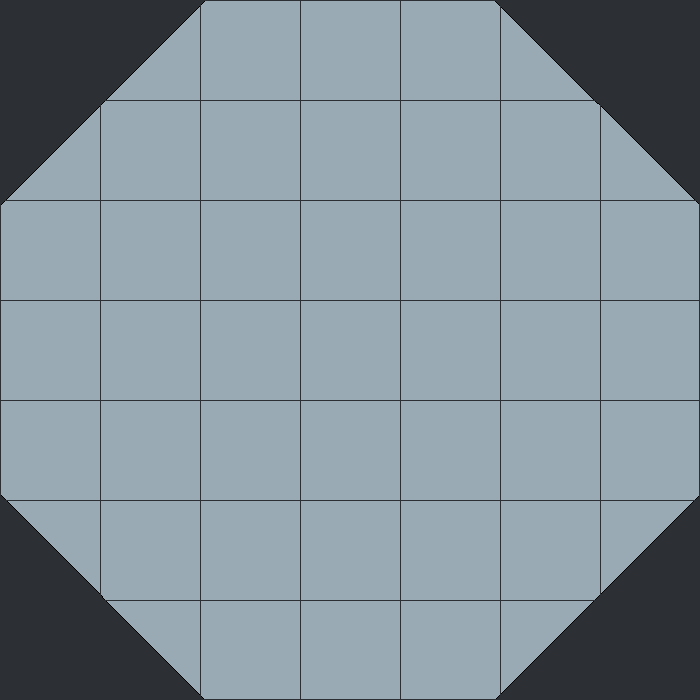

In [47]:
OctagonGrid(7)

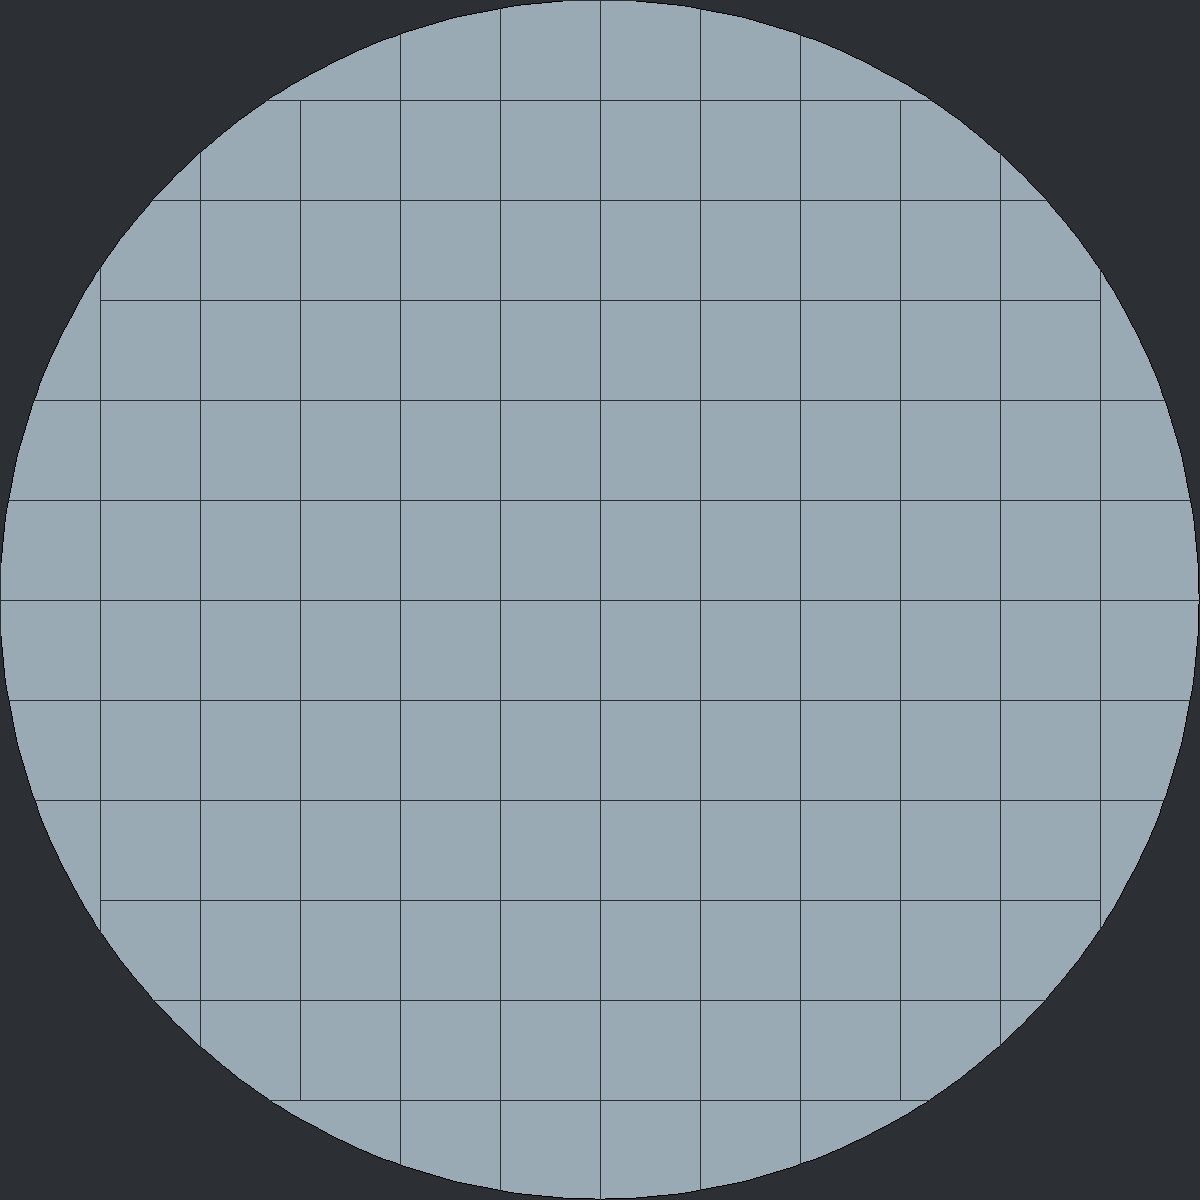

In [286]:
im

In [285]:
data

array([[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]])

In [278]:
data[data == True] = 5

In [280]:
data.astype(int)

array([[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]])

In [281]:
data

array([[False, False, False, False,  True,  True,  True,  True, False,
        False, False, False],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True, False, False],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True

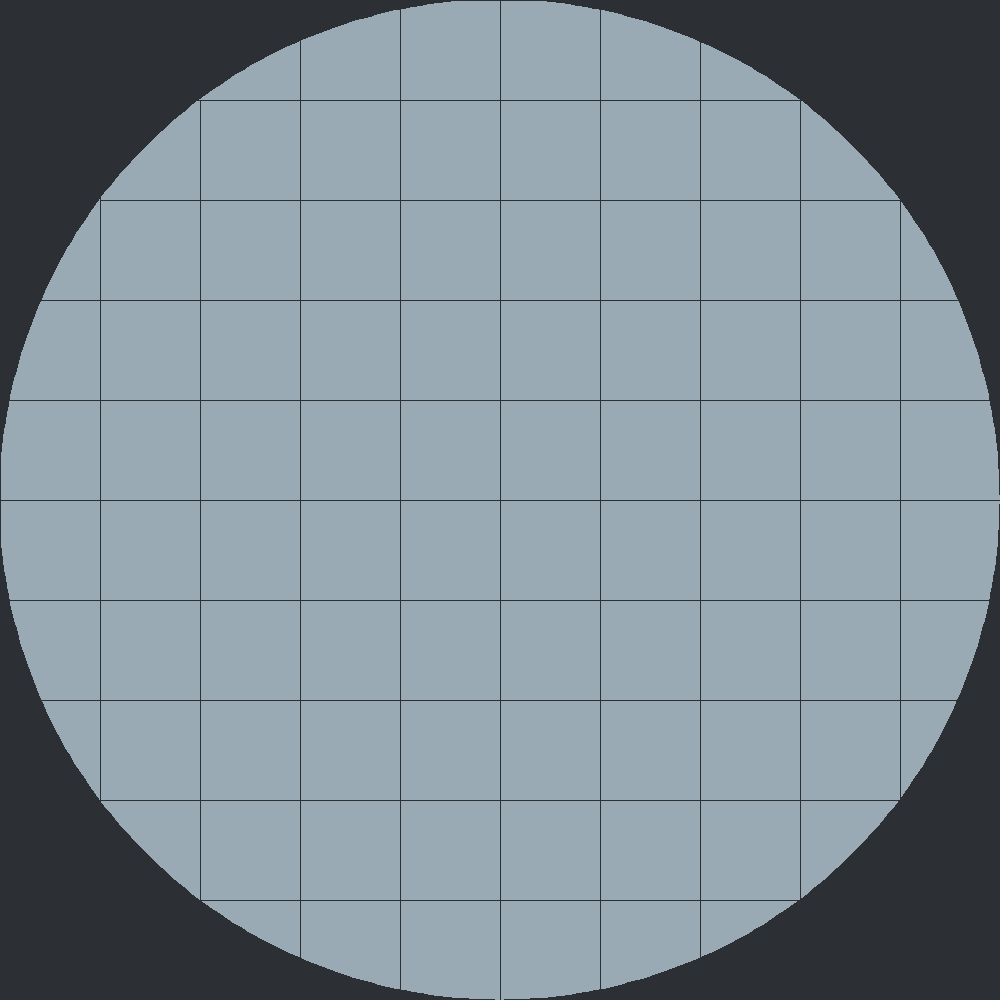

In [262]:
myArray = np.zeros((10,10))
x, y = np.ogrid[0: 10, 0: 10]
mask = (x-4.5)**2+(y-4.5)**2 <= 5**2
im = CircleGridByArray(mask)
im

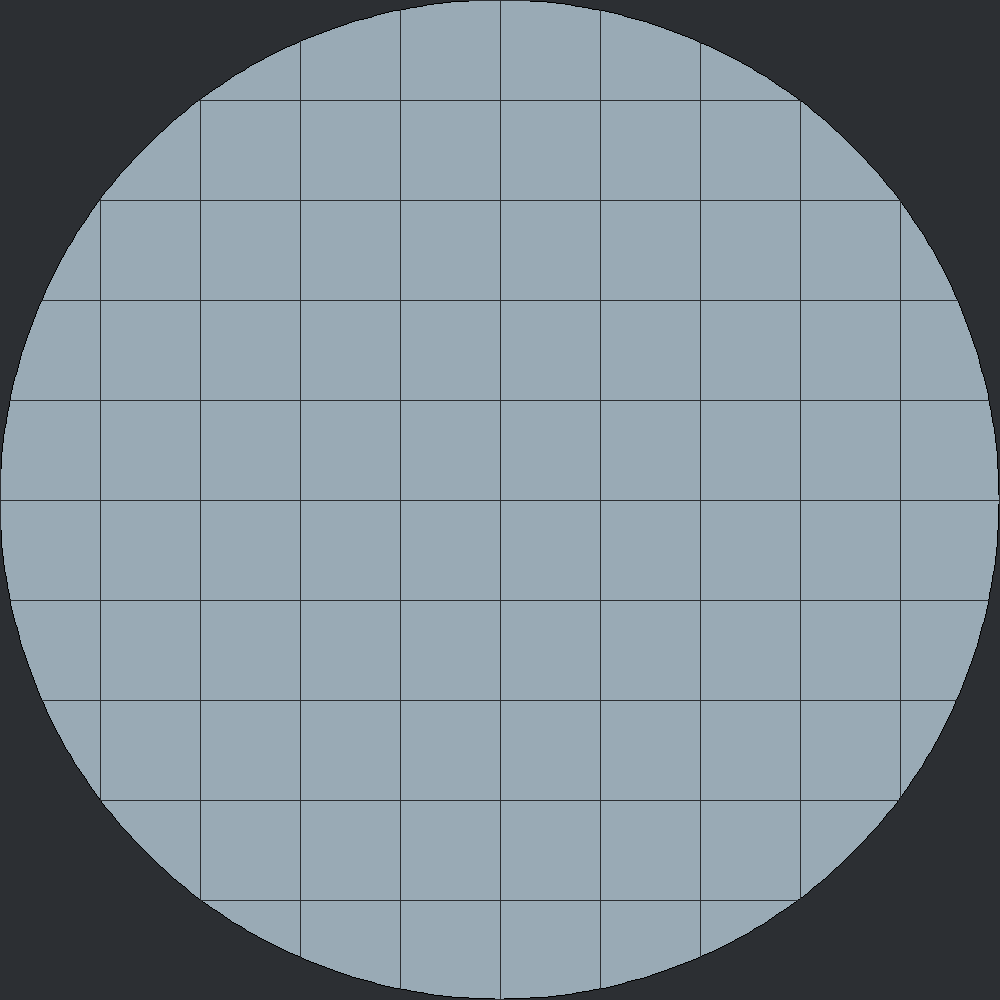

In [222]:
CircleGrid(10)

In [204]:
donut = np.logical_and(circle<(6400+60), circle>(6400-60))

In [206]:
print(donut)

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


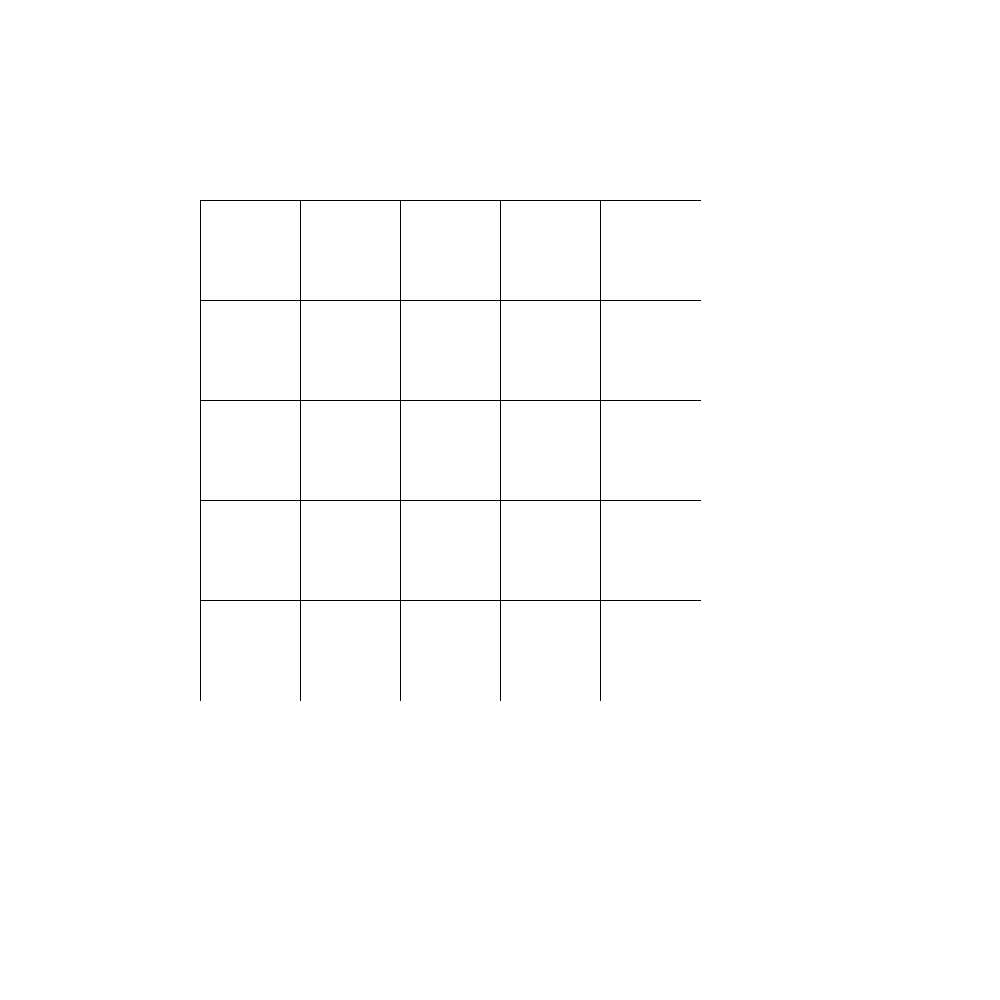

In [188]:
GridByArray(myArray, 100)

In [4]:
class Corridor:
    def __init__(self, length=10, width=4):
        self.length = length
        self.width = width
        self.data = np.zeros((self.width, self.length))
        self.grid = ImageByArray(self.data, 100)

In [ ]:
Corridor(20, 2).grid

In [ ]:
foo = np.zeros((10,10))

In [ ]:
foo[2:5, 2:5] = 1

In [ ]:
foo

In [ ]:
im = Image.new('RGB', (100,100), 'green')

In [ ]:
im.tobytes()

In [ ]:
pdfFileObj = open('C:\\Users\\Ferret\\Dropbox\\Numenera\\Core Book.pdf', 'rb')
pdfReader = pdf.PdfFileReader(pdfFileObj)

In [ ]:
page = pdfReader.getPage(232)

In [ ]:
page.extractText()

In [ ]:
pdfReader.getOutlines()[3]['/Title']

In [ ]:
GetImageFromPDF('C:\\Users\\Ferret\\Dropbox\\Numenera\\Core Book.pdf', 232)

In [ ]:
pdfFileObj = open('F:\\RPG Stuff\\4e\\PDFs\\Monster Manual 1.pdf', 'rb')
pdfReader = pdf.PdfFileReader(pdfFileObj)

In [ ]:
page = pdfReader.getPage(7)

In [ ]:
page

In [ ]:
outlines = pdfReader.getOutlines()

In [ ]:
outlines[1][2][0]['/Title']

In [ ]:
xobj = outlines[1][3]['/Page']['/Parent']['/Kids'][0].getObject()['/Resources']['/XObject'].getObject()

In [ ]:
xobj

In [ ]:
outlines[1][3]['/Page']['/Parent']['/Parent']['/Kids'][3].getObject()['/Kids'][2].getObject()['/Resources']['/XObject'].getObject()
size = xobj['/Im0']['/Width'], xobj['/Im0']['/Height']
data = xobj['/Im0'].getData()
mode = 'RGB'
img = open('bar.jpg', 'wb')
img.write(data)
img.close()

In [ ]:
xobj = outlines[1][3]['/Page']['/Parent']['/Kids'][0].getObject()['/Resources']['/XObject'].getObject()
size = xobj['/Im0']['/Width'], xobj['/Im0']['/Height']
data = xobj['/Im0'].getData()
mode = 'RGB'
img = open('foo.jpg', 'wb')
img.write(data)
img.close()

In [ ]:
outlines[1][3]['/Type']

In [ ]:
foo = outlines[1][4][1]

In [ ]:
len(foo)

In [ ]:
outlines[1][4][1][0]['/Title']

In [ ]:
outlines[1][4][3][0]['/Title']

In [ ]:
pdfReader.getDestinationPageNumber(outlines[1][4][1][0])

In [ ]:
pagenum = pdfReader.getDestinationPageNumber(outlines[1][4][1][0])

In [ ]:
outlines[1][4][1][0]['/Title']

In [ ]:
def InitializeMonsters(path, inputDictionary):
	pdfFileObj = open(path, 'rb')
	pdfReader = pdf.PdfFileReader(pdfFileObj)
	outlines = pdfReader.getOutlines()

	bookmarks = []
	for outline in outlines:
		bookmarks.append(pdfReader.getDestinationPageNumber(outline))
	bookmarks.append(pdfReader.numPages-1)
	pages = []
	for index in range(len(bookmarks)-1):
		pages.append(bookmarks[index+1] - bookmarks[index])
        
	for outline in range(len(outlines)):
		inputDictionary[outlines[outline]['/Title']] = {'pageStart' : pdfReader.getDestinationPageNumber(outlines[outline]),
														'pageSpan'  : pages[outline],
														'book'		: path.split('\\')[-1].strip('.pdf') }


In [ ]:
def InitializeMM3(path, inputDictionary):
    pdfFileObj = open(path, 'rb')
    pdfReader = pdf.PdfFileReader(pdfFileObj)
    outlines = pdfReader.getOutlines()
    outlines = pdfReader.getOutlines()
    monsterBookmarkLists = outlines[1][4][1::2]
    monsters = []
    for monsterList in monsterBookmarkLists:
        for monster in monsterList:
            monsters.append(monster)
    bookmarks = []
    for monster in monsters:
        bookmarks.append(pdfReader.getDestinationPageNumber(monster))
        bookmarks.append(pdfReader.numPages-1)
    bookmarks.append(pdfReader.numPages-1)
    pages = []
    for index in range(len(bookmarks)-1):
        pages.append(bookmarks[index+1] - bookmarks[index])
    for monster in range(len(monsters)):
        inputDictionary[monsters[monster]['/Title'].strip()] = {'pageStart' : pdfReader.getDestinationPageNumber(monsters[monster]),
                                                                'pageSpan'  : pages[monster],
                                                                'book'      : path.split('\\')[-1].strip('.pdf')}

In [ ]:
mm3Path = 'F:\\RPG Stuff\\4e\\PDFs\\Monster Manual 3.pdf'
monsterDict = {}
InitializeMM3(mm3path, monsterDict)

In [ ]:
def GetImageFromPDF(path, pageNumber, name=None):
	myPDF = pdf.PdfFileReader(open(path, 'rb'))
	page = myPDF.getPage(pageNumber)
	xObject = page['/Resources']['/XObject'].getObject()
	for obj in xObject:
		if xObject[obj]['/Subtype'] == '/Image':
			if(name):
				title = name+'.jpg'
			else:
				title = obj[1:]+'.jpg'
			size = (xObject[obj]['/Width'], xObject[obj]['/Height'])
			data = xObject[obj].getData()
			mode = "RGB"
			img = open(title, "wb")
			img.write(data)
			img.close()
			return title
	return None

In [ ]:
GetImageFromPDF(mm3path, 11)

In [ ]:
monsterDict

In [ ]:
pagenum = pdfReader.getDestinationPageNumber(outlines[1][4][1][0])
GetImageFromPDF(pdfReader, pagenum, outlines[1][4][1][0]['/Title'].strip())

In [ ]:
outlines = pdfReader.getOutlines()

bookmarks = []
for outline in outlines:
    bookmarks.append(pdfReader.getDestinationPageNumber(outline))
bookmarks.append(pdfReader.numPages-1)
pages = []
for index in range(len(bookmarks)-1):
    pages.append(bookmarks[index+1] - bookmarks[index])
        
monsterDict = {}
for outline in range(len(outlines)):
    monsterDict[outlines[outline]['/Title']] = {'pageStart' : pdfReader.getDestinationPageNumber(outlines[outline]),
                                                'pageSpan'  : pages[outline],
                                                'book'      : 'Monster Manual 2'}

In [ ]:
def GetImageFromPDF(pdf, pageNumber, name=None):
    page = pdf.getPage(pageNumber)
    xObject = page['/Resources']['/XObject'].getObject()
    for obj in xObject:
            if xObject[obj]['/Subtype'] == '/Image':
                if(name):
                    title = name+'.jpg'
                else:
                    title = obj[1:]+'.jpg'
                size = (xObject[obj]['/Width'], xObject[obj]['/Height'])
                data = xObject[obj].getData()
                mode = "RGB"
                img = open(title, "wb")
                img.write(data)
                img.close()
                return title

In [ ]:
for page in range(monsterDict['Angel']['pageSpan']):
    print(GetImageFromPDF(pdfReader, monsterDict['Angel']['pageStart'] + page))

In [ ]:
monsterString = ''
for key in monsterDict.keys():
    monsterString += '{:<24} - {}\n'.format(key, monsterDict[key]['book'])
print(monsterString)

In [ ]:
mm2Path = 'F:\\RPG Stuff\\4e\\PDFs\\Monster Manual 2.pdf'
mm2Path.split('\\')[-1].strip('.pdf')

In [ ]:
gridSpacing = 100
width = 12
height = 12
image = Image.new('RGB', (width*gridSpacing, height*gridSpacing), 'white')


In [ ]:
def Grid(image, spacing):
    drawer = ImageDraw.Draw(image)
    for pixel in range(0, image.width, spacing):
        drawer.line((pixel, 0, pixel, image.height), fill=0, width=1)
    for pixel in range(0, image.height, spacing):
        drawer.line((0, pixel, image.width, pixel), fill=0, width=1)
    drawer.line((image.width-1, 0, image.width-1, image.height), fill=0, width=1)
    drawer.line((0, image.height-1, image.width, image.height-1), fill=0, width=1)

In [ ]:
def ImageByArray(inputArray, spacing):
    image = Image.new('RGB', (inputArray.shape[0]*spacing, inputArray.shape[1]*spacing), 'white')
    Grid(image, spacing)
    return image

In [ ]:
image.width

In [ ]:
gridArray = np.zeros((12,12))
ImageByArray(gridArray, gridSpacing)

In [ ]:
gridArray = np.zeros((5,30))
arrayGrid = Image.new('RGB', (gridArray.shape[0]*gridSpacing, gridArray.shape[1]*gridSpacing), 'white')
Grid(arrayGrid, gridSpacing)
arrayGrid

In [ ]:
Grid(width, height, gridSpacing, gridSpacing, image)
image

In [ ]:
image.save()

In [ ]:
import re

In [ ]:
#pattern = '\d+d\d+(k\d+)?([\+|-]\d)?'
pattern = '(?P<Number>\d+)d(?P<Die>\d+)(?P<Kept>k\d+)?(?P<Modifier>[\+|-]\d)?'

string = '1d20'
foo = re.match(pattern, string)
foo

In [ ]:
foo.groupdict()

In [ ]:
int(None)

In [ ]:
myDict = foo.groupdict()

In [ ]:
'foo' in myDict

In [ ]:
myDict['Kept']

In [ ]:
foo = 'k1'

In [ ]:
image.paste()

In [ ]:
myImage = Image.open('./Discord Bot/Images/NPCs/Xelophehod.png')

In [ ]:
myImage.mode

In [ ]:
myImage.resize((1200,1200))

In [ ]:
gridImage = Image.open('./Discord Bot/Grid.png')
gridImage

In [ ]:
gridImage.paste(myImage.resize((99,99)), (201,201))

In [ ]:
gridImage

In [ ]:
gridImage.paste(myImage)

In [ ]:
gridImage.close()

In [ ]:
myImage.close()

In [ ]:
myImage